# Lending Case Study

In [1]:
#importing required python libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Warnings library will be used to ignore some warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the file and processing all the data at once
df=pd.read_csv('loan.csv',low_memory=False)

In [3]:
#increasing column number in the df to 150 as some columns are skipped in case of large dataset
pd.set_option("display.max_columns", 150)
#top 5 rows of data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# checking number of rows and columns
df.shape

(39717, 111)

In [5]:
#increasing the number of rows in the data frame to see all columns 
pd.set_option("display.max_rows", 150)
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


**There are lot of columns with null values, to see more clearly calculating percentage null values for columns**

In [6]:
# checking % null values
colNullperc=round((df.isnull().sum()/len(df))*100,2)
colNullperc

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

Removing columns with null value percentage 100 as these columns have no significance

In [7]:
#dropping columns with 100% null values
df=df.drop(colNullperc[colNullperc==100].index, axis = 1)

In [8]:
#shape after removing columns
df.shape

(39717, 57)

In [9]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


###### There are columns which have single values for all rows, so it would be wiser to remove these columns as they wont contribute much in the analysis

In [10]:
# count of unique values in columns
df.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
dtype: int64

In [11]:
#dropping columns 
df.drop(df.nunique().sort_values().head(9).index,axis=1,inplace=True)
df.shape

(39717, 48)

###### Removing columns which are not required:
* "id", "member_id", "url" : they are columns with unique value hence only one can be used as Primary key
* "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" as they do not contribute much to the analysis so removing them

**Below columns  are customer behaviour so we can ignore these columns as well.**

'delinq_2yrs','revol_bal','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt'


In [12]:
df=df.drop([ "id","emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", 
                "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
                "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","earliest_cr_line","inq_last_6mths",
                 "pub_rec","title","next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record","url","member_id","pub_rec_bankruptcies"], axis = 1)

In [13]:
df.shape

(39717, 21)

In [14]:
# dropping rows with home ownership with None value
df=df[df.home_ownership!="NONE"]

**Loan Status** has value Current, which represent ongoing loan removing this as it will not contribute much to our analyses

In [15]:
df=df[df.loan_status!="Current"]

* Removing space from starting of the value of column **term**.
* Removing None values from home_ownership column
* Removing **%** from int_rate
* Removing **%** from revol_util

In [16]:
df.term=df.term.str.strip()

In [17]:
df=df[df.home_ownership!="NONE"]

In [18]:
df.int_rate=df.int_rate.str.strip("%")

In [19]:
df.int_rate=df.int_rate.str.strip("%").astype(float)
df.revol_util=df.revol_util.str.strip("%").astype(float)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,revol_util,total_acc
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,83.7,9
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,9.4,4
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,98.5,10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,21.0,37
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,9,28.3,12


In [20]:
#changing data type of issue_d column
df.issue_d=pd.to_datetime(df.issue_d, format='%b-%y')

In [21]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,revol_util,total_acc
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,3,83.7,9
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,3,9.4,4
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2,98.5,10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,10,21.0,37
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,9,28.3,12


In [22]:
# adding new column approved loan amount ratio to dataframe
df['approved_Loan_amnt_ratio'] = round(df.funded_amnt_inv*100/df.loan_amnt,2)

#### Extracting year and month from issue_d 

In [23]:
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_mon']=pd.DatetimeIndex(df['issue_d']).month

In [24]:
#checking data type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        38574 non-null  int64         
 1   loan_amnt                 38574 non-null  int64         
 2   funded_amnt               38574 non-null  int64         
 3   funded_amnt_inv           38574 non-null  float64       
 4   term                      38574 non-null  object        
 5   int_rate                  38574 non-null  float64       
 6   installment               38574 non-null  float64       
 7   grade                     38574 non-null  object        
 8   sub_grade                 38574 non-null  object        
 9   emp_length                37541 non-null  object        
 10  home_ownership            38574 non-null  object        
 11  annual_inc                38574 non-null  float64       
 12  verification_statu

###### Emp_length could be an important perimeter, Changing the data type of column by assuming <1 as 0 and 10+ as 10 for simplicity

In [101]:
#checking values for emp_length
df.emp_length.value_counts()

10    9147
0     4406
2     4164
3     3915
4     3255
5     3103
1     3095
6     2113
7     1666
8     1376
9     1186
Name: emp_length, dtype: int64

In [26]:
# handling null values for emp_length
colNullperc=round((df.isnull().sum()/len(df))*100,2)
colNullperc[colNullperc!=0]

emp_length    2.68
revol_util    0.13
dtype: float64

In [27]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [28]:
df.emp_length=pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [29]:
df.emp_length.value_counts()

10    9521
0     4506
2     4291
3     4012
4     3342
5     3193
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

#### Outliner removal

In [30]:
q_annual= df.annual_inc.quantile([0.5,0.25,0.50 ,0.75,0.90, 0.95, 0.97,0.98, 0.99])
q_annual

0.50     58860.28
0.25     40000.00
0.50     58860.28
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234162.00
Name: annual_inc, dtype: float64

In [31]:
# removing data from 97 percentile
per_97 = df['annual_inc'].quantile(0.97)
df=df[df.annual_inc <= per_97]

##  Analysis

**Loan amount**

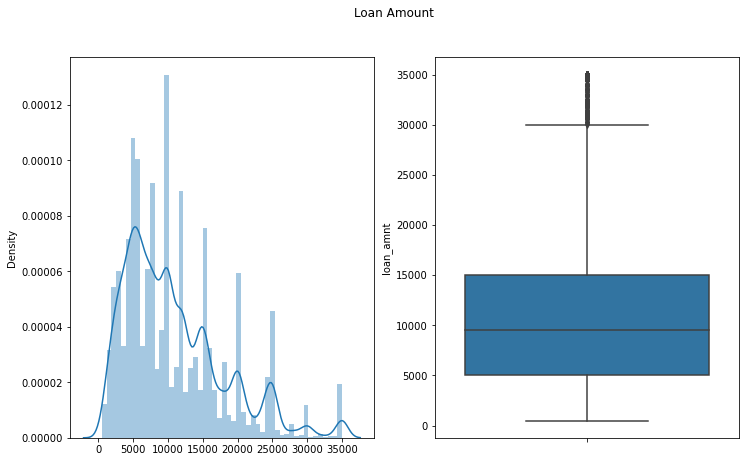

In [106]:
#Setting figure size
plt.figure(figsize=(12,7))
#setting subplot index
plt.subplot(1,2,1)
sns.distplot(x=df.loan_amnt) #distplot 

plt.subplot(1,2,2)
sns.boxplot(y=df.loan_amnt) #boxplot
plt.suptitle("Loan Amount")
plt.show()

As observed from above charts,very Few  people applied for loan grater than 30,000

**Approved Loan Amount ratio**

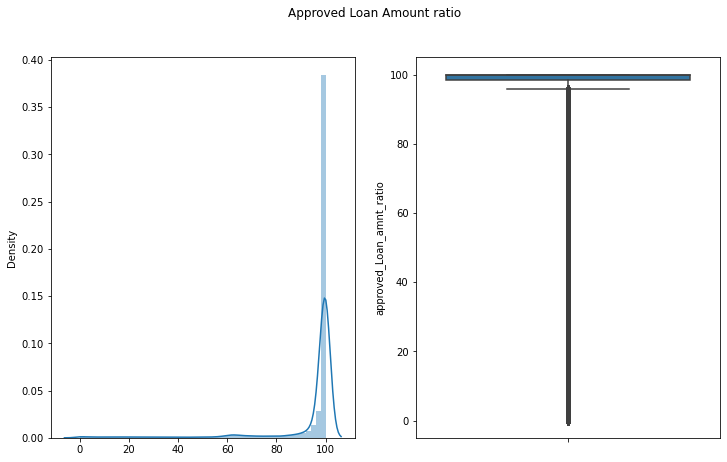

In [105]:
#Setting figure size
plt.figure(figsize=(12,7))
#setting subplot index
plt.subplot(1,2,1)
sns.distplot(x=df.approved_Loan_amnt_ratio) #distplot 
plt.subplot(1,2,2)
sns.boxplot(y=df.approved_Loan_amnt_ratio) #boxplot
plt.suptitle("Approved Loan Amount ratio")
plt.show()

**Loan Status**

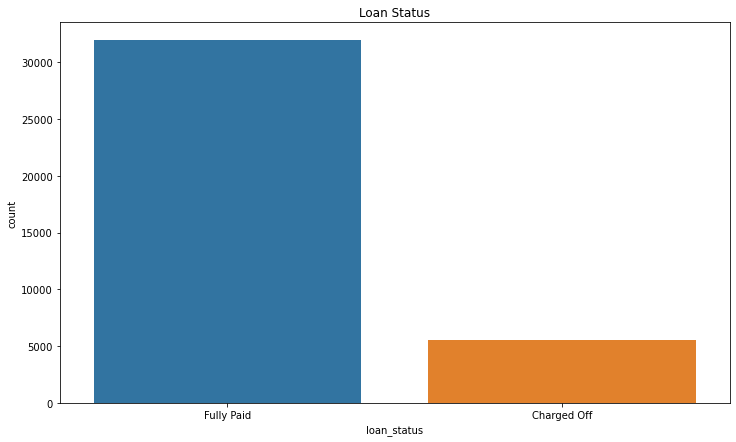

In [107]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'loan_status', data = df)
plt.title("Loan Status")
plt.show()

 There are around 5000 people who are defaulter in loan

**Grade**

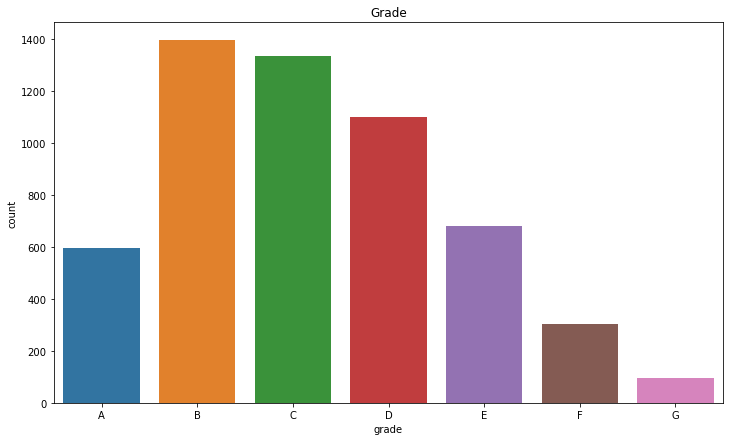

In [117]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = df[df.loan_status == 'Charged Off'])
plt.title("Grade")
plt.show()

**From Above data it is clear that max Charged off happens with people having grade B.**
Further breaking the data using sub grade column people with B5 followed by B3 and C1 grade are the ones who charged off loan.

In [36]:
# changing sub grade column value 
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

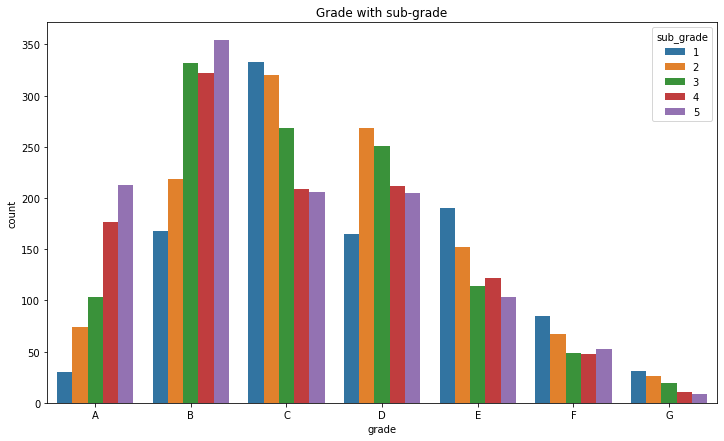

In [108]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'])
plt.title("Grade with sub-grade")
plt.show()

**Purpose**

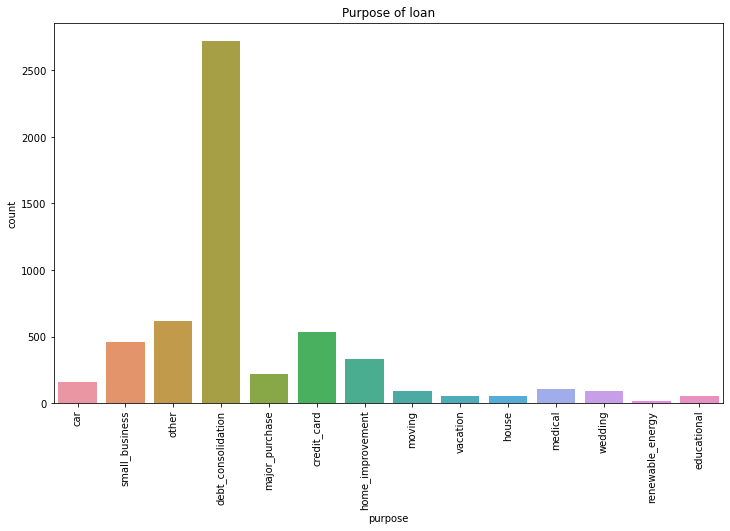

In [116]:
# Analyzing Purpose column
plt.figure(figsize=(12,7))
sns.countplot(x = 'purpose',data = df[df.loan_status == 'Charged Off'])
plt.title("Purpose of loan")
plt.xticks(rotation=90)
plt.show()

People with debt_consolidation purpose charged off loan more followed by other and credit card.

**Employement Length**

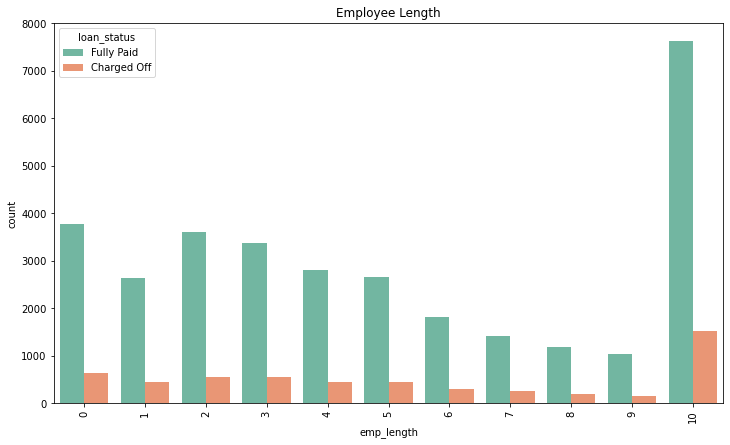

In [39]:
# Analysing Employement Length column
plt.figure(figsize=(12,7))
sns.countplot(x = 'emp_length',hue = 'loan_status',palette = "Set2",data = df)
plt.title('Employee Length')
plt.show()

People with employee length 10 or more charged off the loan.

**Home ownership**

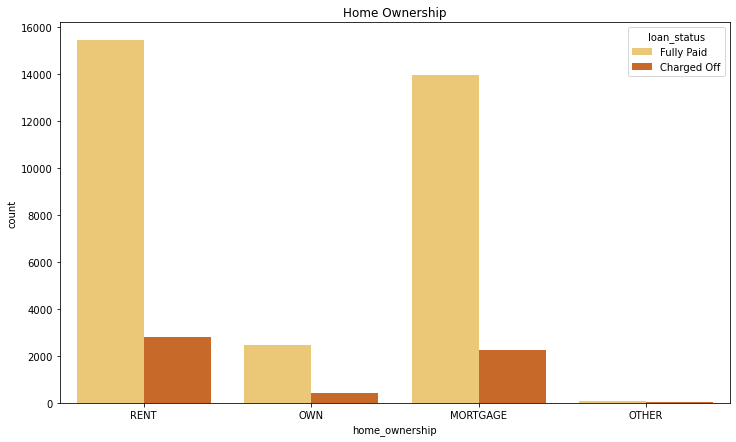

In [40]:
# Analysing home Ownership
plt.figure(figsize=(12,7))
sns.countplot(x = 'home_ownership',hue = 'loan_status',palette = "YlOrBr",data = df)
plt.title('Home Ownership')
plt.show()

People living on Rent have charged off more.

**Income**

In [41]:
#creating bin for annual income group column
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,labels =['4k-30k','30k-60k','60k-90k','90k-120k','120k-165k'])

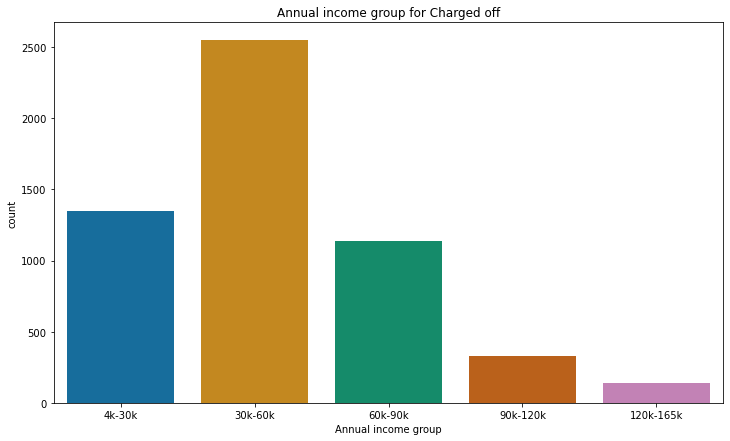

In [42]:
plt.figure(figsize = (12,7))
sns.countplot(x='annual_inc_groups',palette = "colorblind", data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Annual income group')
plt.title('Annual income group for Charged off')
plt.show()

From above it shows people in salary range 30k to 60k  have more chances of defaulting

**Address state**

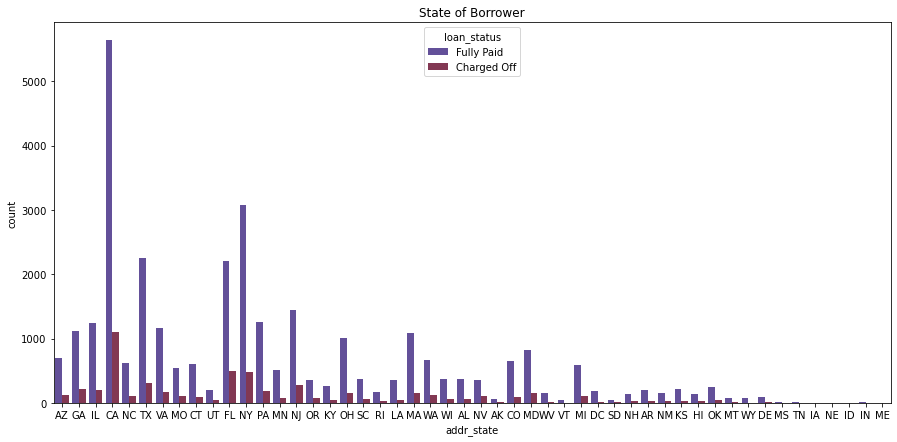

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'addr_state',hue = 'loan_status',palette = "twilight",data = df)
plt.title('State of Borrower')
plt.show()

From Above it can be concluded that people from "CA" state default loan more than other state.

**Verification Status**

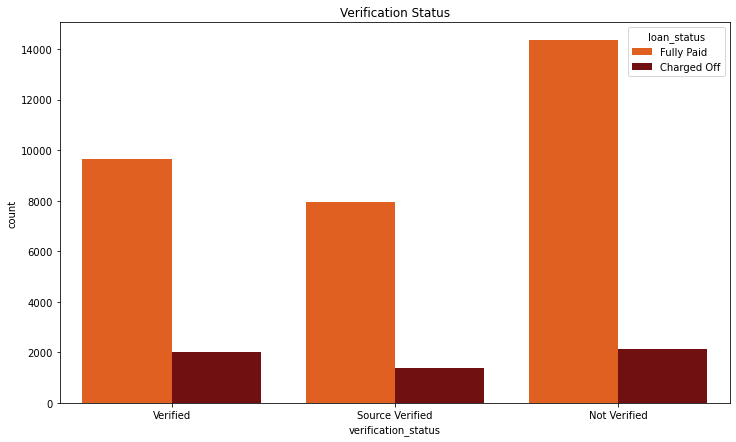

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'verification_status',hue = 'loan_status',palette = "gist_heat_r",data = df)
plt.title('Verification Status')
plt.show()

People who are not verified have sightly higher chance of defaulting loan

**Open credit lines**

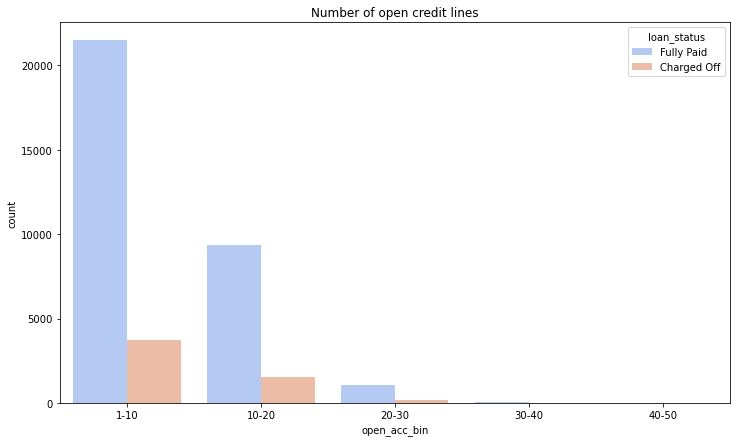

In [109]:
# Analysing open_acc
#creating bins for open_acc
df['open_acc_bin'] = pd.cut(df['open_acc'],bins = 5,labels=['1-10','10-20','20-30','30-40','40-50'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='open_acc_bin',hue='loan_status',palette = "coolwarm", data=df)
plt.title('Number of open credit lines')
plt.show()

People having number of open credit lines between 1 to 10 charged off loan more when compared to others.

**Interest rate**

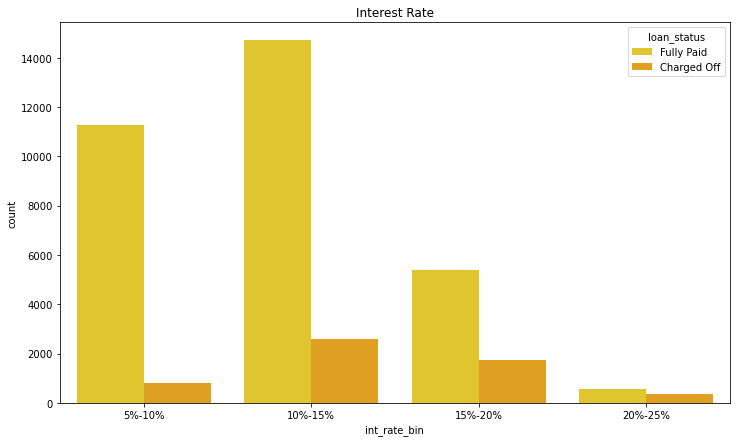

In [46]:
# Analysing int_rate
#creating bins for interest rate
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='int_rate_bin',hue='loan_status',palette = "Wistia", data=df)
plt.title('Interest Rate')
plt.show()

People having interest rate in between 10 to 15 % have higher chance of defaulting.

**Revolving line utilization rate**

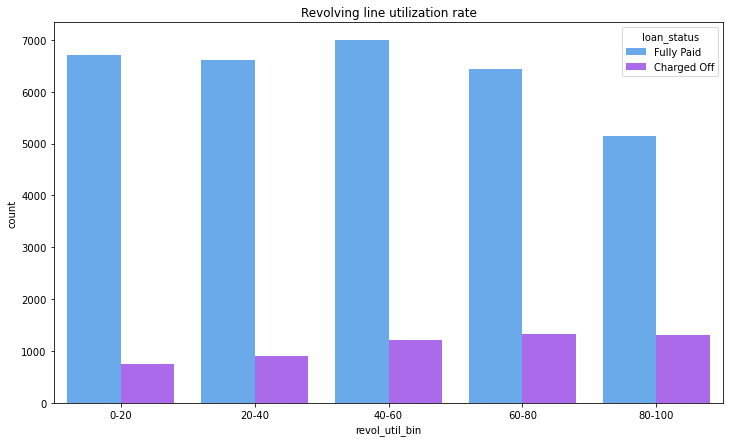

In [47]:
# Analysing revol_util
#creating bins for revol_util
df['revol_util_bin'] = pd.cut(df['revol_util'], bins=5,labels=['0-20','20-40','40-60','60-80','80-100'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='revol_util_bin',hue='loan_status',palette = "cool", data=df)
plt.title('Revolving line utilization rate')
plt.show()

People having Revolving line utilization rate in between 60-80 have higher chance of defaulting.

**Total number of credit lines currently in the borrower's credit file**

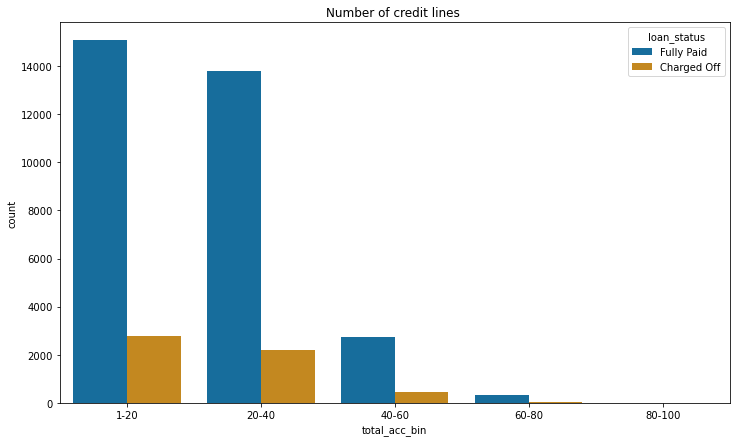

In [48]:
# Analysing total_acc
#creating bins for total_acc
df['total_acc_bin'] = pd.cut(df['total_acc'], bins=5,labels=['1-20','20-40','40-60','60-80','80-100'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='total_acc_bin',hue='loan_status',palette = "colorblind", data=df)
plt.title('Number of credit lines ')
plt.show()

People having number of credit lines between 1-20 have higher chance of defaulting

**Loan Term Period**

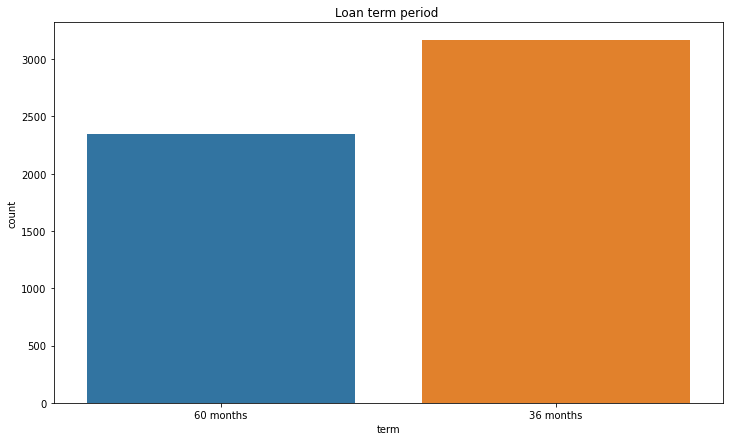

In [49]:
plt.figure(figsize = (12,7))
sns.countplot(x='term', data=df[df.loan_status=="Charged Off"])
plt.title('Loan term period ')
plt.show()

People having loan term of 36 months have higher chance of defaulting.

**Loan issue year**

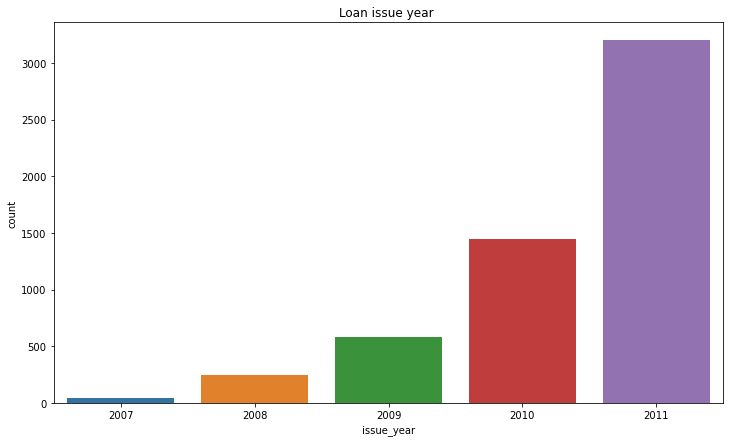

In [50]:
plt.figure(figsize = (12,7))
sns.countplot(x='issue_year', data=df[df.loan_status=="Charged Off"])
plt.title('Loan issue year ')
plt.show()

People who were given loan in year 2011 have defaulted loan more.

**Loan issue month**

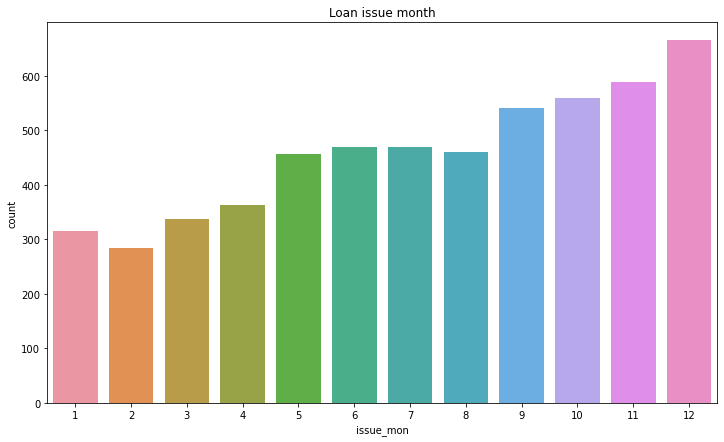

In [111]:
plt.figure(figsize = (12,7))
sns.countplot(x='issue_mon', data=df[df.loan_status=="Charged Off"])
plt.title('Loan issue month')
plt.show()

People who were given loan in Dec have defaulted loan more when compared to other months.

**DTI**

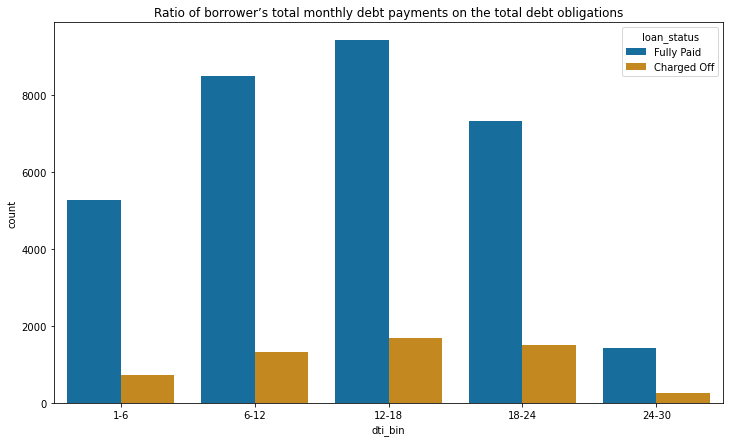

In [52]:
# Analysing dti
#creating bins for dti
df['dti_bin'] = pd.cut(df['dti'], bins=5,labels=['1-6','6-12','12-18','18-24','24-30'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='dti_bin',hue='loan_status',palette = "colorblind", data=df)
plt.title('Ratio of borrower’s total monthly debt payments on the total debt obligations')
plt.show()

People who have dti between 12 to 18 have defaulted loan more when compared to other dti range.

**Installment**

In [53]:
#Analysing installment column
df.installment.describe()

count    37426.000000
mean       315.824025
std        202.580164
min         15.690000
25%        164.020000
50%        273.350000
75%        414.062500
max       1305.190000
Name: installment, dtype: float64

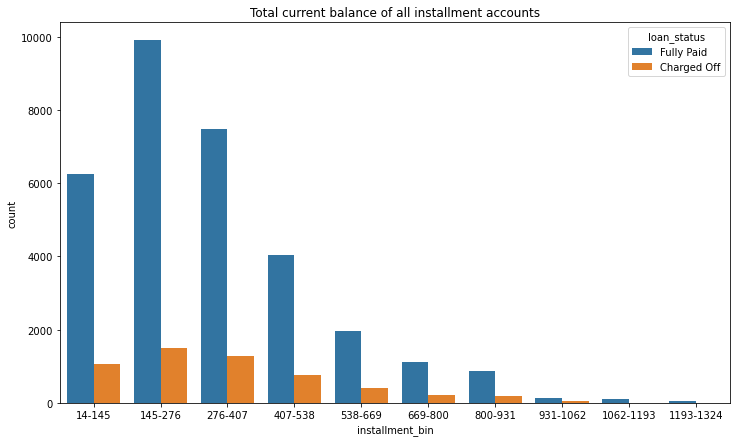

In [54]:
#creating bin for installment column
df['installment_bin'] = pd.cut(df['installment'], bins=10,labels=['14-145','145-276','276-407','407-538','538-669','669-800','800-931','931-1062','1062-1193','1193-1324'])
#creating visualization
plt.figure(figsize = (12,7))
sns.countplot(x='installment_bin',hue='loan_status',palette = "tab10", data=df)
plt.title('Total current balance of all installment accounts')
plt.show()

People having installment between 145 to 276 have more chances of defaulting the loan.

## Observations based upon above analysis:
**From above analysis we can observe below points:**
* There are around 5000 people who are defaulter in loan.
* Probability of charged off increases with people having grade B. Further breaking the data using sub grade column people with   B5 are the ones who charged off loan.
* People with debt_consolidation purpose charged off loan more.
* People with employee length 10 or more charged off the loan.
* People having house_ownership as Rent have charged off more.
* People in salary range 30k to 60k have more chances of defaulting.
* People from "CA" state default loan more than other state.
* People who are not verified have higher chance of defaulting loan.
* People having number of open credit lines between 1 to 10 charged off loan more when compared to others.
* People having interest rate in between 10 to 15 % have higher chance of defaulting.
* People having Revolving line utilization rate in between 60-80 have higher chance of defaulting.
* People having Number of credit lines between 1-20 have higher chance of defaulting.
* People having loan term of 36 months have higher chance of defaulting.
* People who were given loan in year 2011 have defaulted loan more, Also people who were given loan in Dec have defaulted loan   more when compared to other months.
* People who have dti between 12 to 18 have defaulted loan more when compared to other dti range.
* People having installment between 145 to 276 have more chances of defaulting the loan.

### Analyzing Columns dependancy

**Correlation matrix**

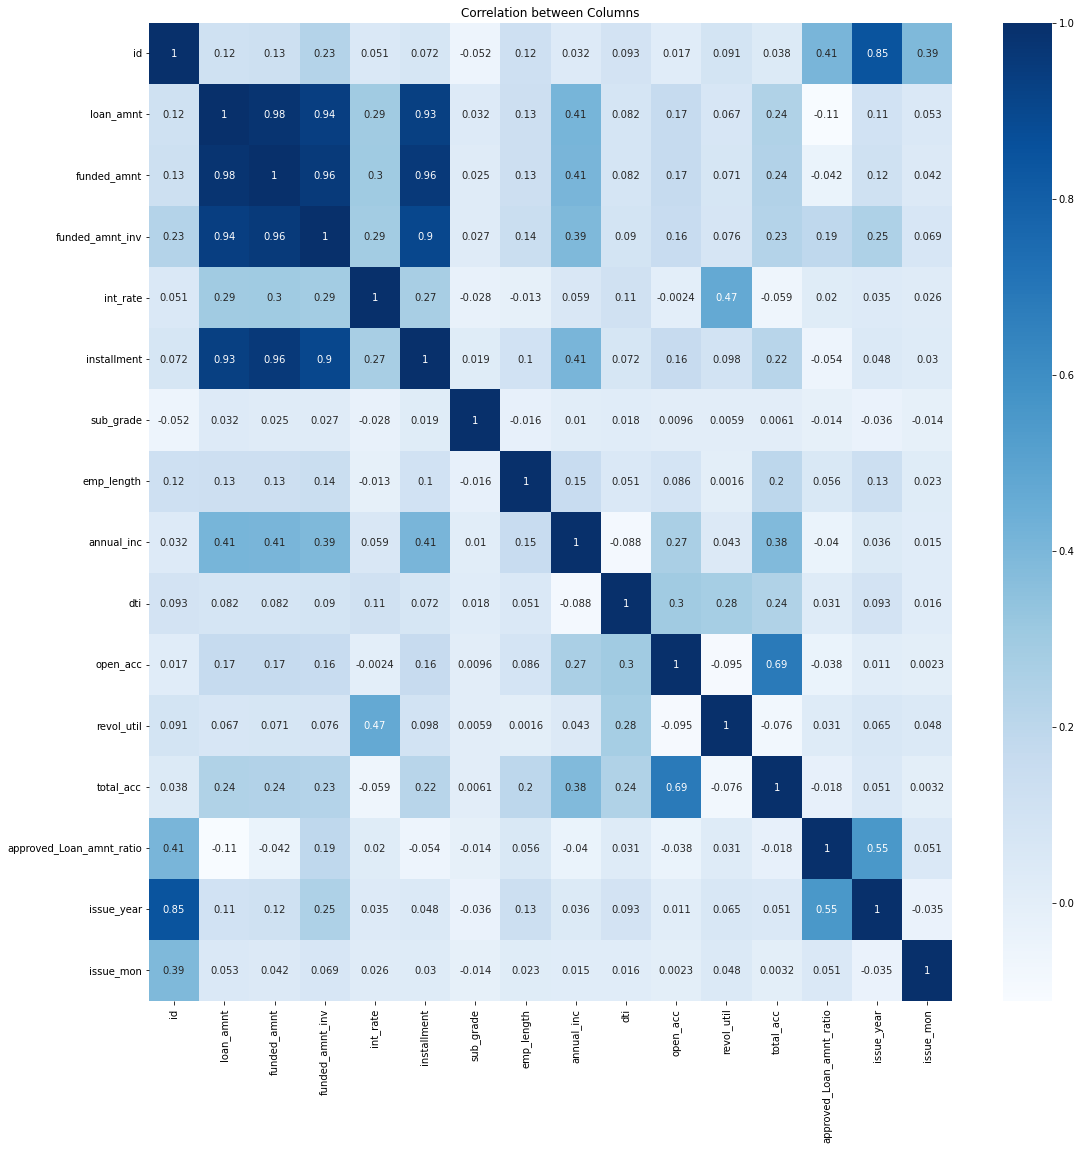

In [55]:
#Finding correlation
corr_tb = df.corr()
plt.figure(figsize=(18,18))
#visalizing correlation on heat map
sns.heatmap(corr_tb, annot = True, cmap='Blues')
plt.title("Correlation between Columns")
plt.show()

* revol_utl and int_rate has positive correlation
* approved_loan_amnt_ratio has positive correlation with issue_year

**Annual income group v/s Purpose**

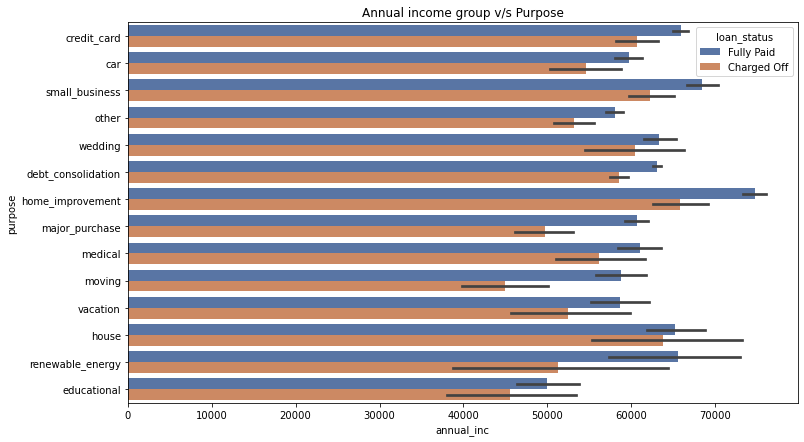

In [92]:
#creating bar graph for annual income & purpose
plt.figure(figsize = (12,7))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.title("Annual income group v/s Purpose")
plt.show()

People having income 60K to 70K with purpose "home improvement" have defaulted loan.

**Annual income group v/s Funded Loan amount**

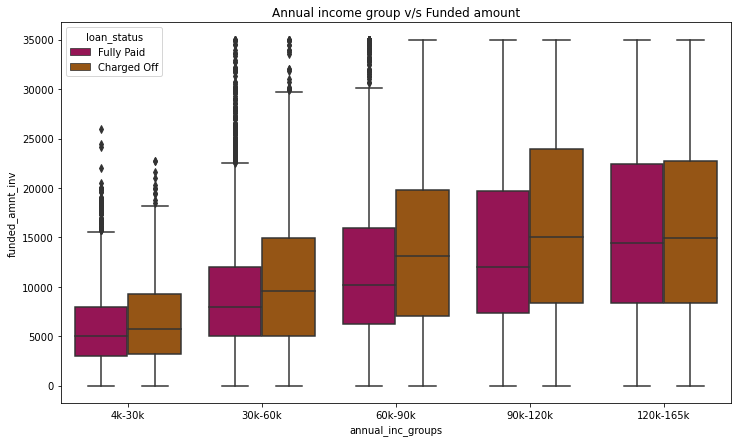

In [91]:
plt.figure(figsize = (12,7))
sns.boxplot(data =df,x='annual_inc_groups', y='funded_amnt_inv', hue ='loan_status',palette="brg")
plt.title("Annual income group v/s Funded Loan amount")
plt.show()

People having income between 90K to 120K with loan received from investor between 20k to 25k have defaulted loan more

**Interest rate group v/s Annual income**

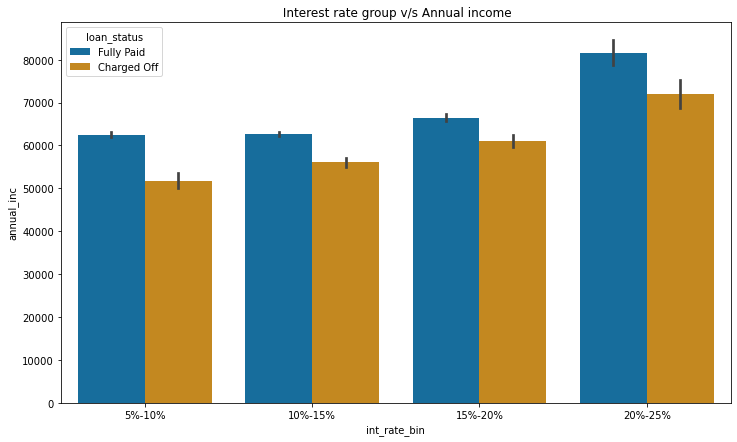

In [93]:
plt.figure(figsize=(12,7))
sns.barplot(y='annual_inc', x='int_rate_bin', data=df, palette="colorblind", hue = 'loan_status')
plt.title(" Interest rate group v/s Annual income")
plt.show()

People having interest rate 20%-25% with annual income 70k to 80k have defaulted more.

**Interest rate v/s 'Purpose/ Grade'**

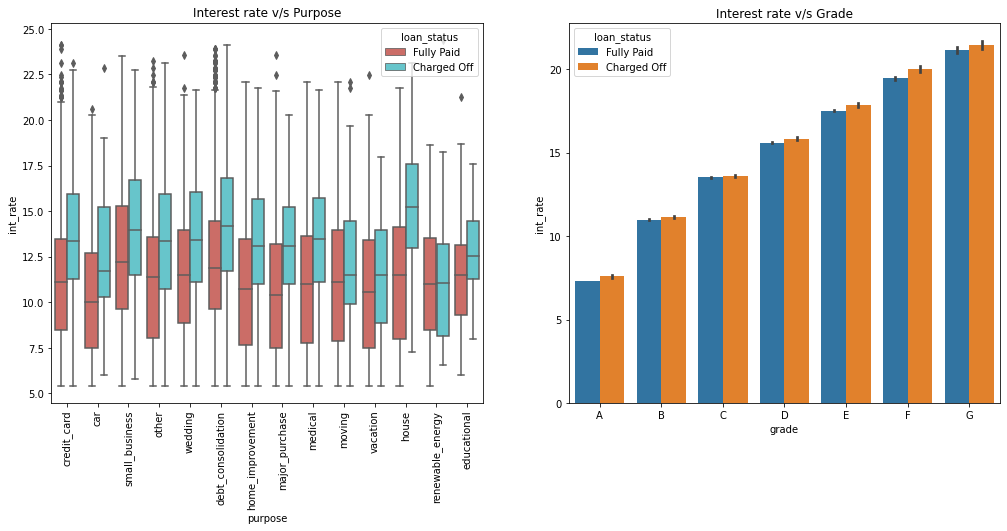

In [95]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
sns.boxplot(x='purpose', y='int_rate', data=df, palette="hls", hue = 'loan_status')
plt.title("Interest rate v/s Purpose")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data =df,y='int_rate', x='grade',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue ='loan_status')
plt.title("Interest rate v/s Grade")
plt.show()

The interest rate increases with Grade, and chances of defaulting increases with grade G.
Also Loan taken for "House" purpose has more chances of defaulting.

**Annual Income v/s Home ownership**

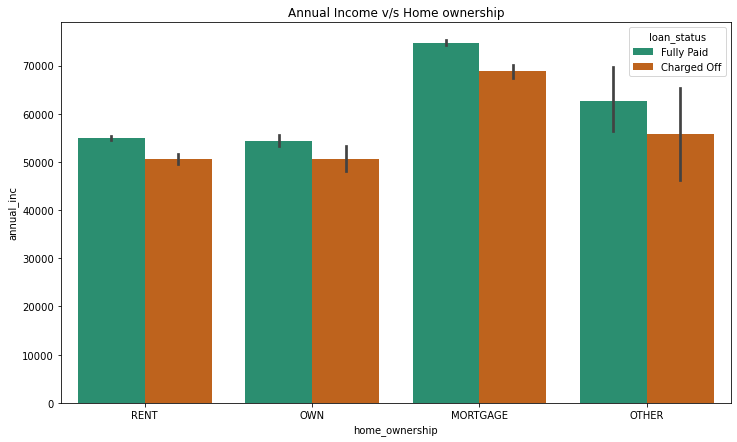

In [96]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="Dark2")
plt.title("Annual Income v/s Home ownership")
plt.show()

People who have mortgaged home ownership and annual income 60k to 70k default more.

**Funded Loan amount v/s 'Employee Length/Verification status'**

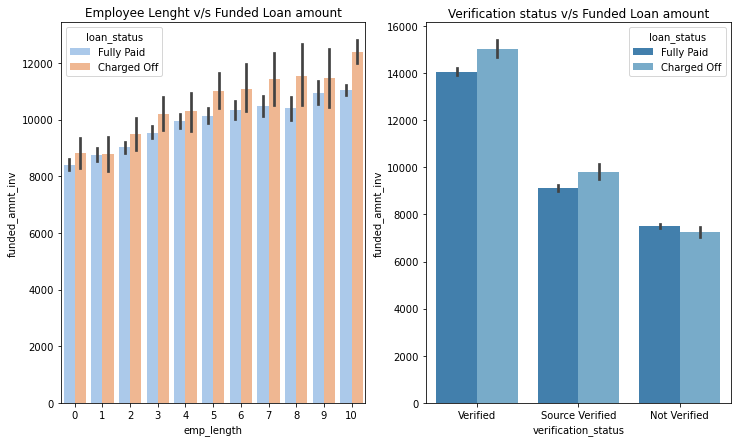

In [98]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.barplot(data =df,y='funded_amnt_inv', x='emp_length', hue ='loan_status',palette="pastel")
plt.title("Employee Length v/s Funded Loan amount")
plt.subplot(1,2,2)
sns.barplot(data =df,y='funded_amnt_inv', x='verification_status', hue ='loan_status',palette="tab20c")
plt.title("Verification status v/s Funded Loan amount")
plt.show()

* People who have 10 years or more employement length and funded loan amount above 12k have more chances of defaulting.
* People with 14k-16k funded loan and verification status verified have defaulted loan.

**Interest rate v/s Term**

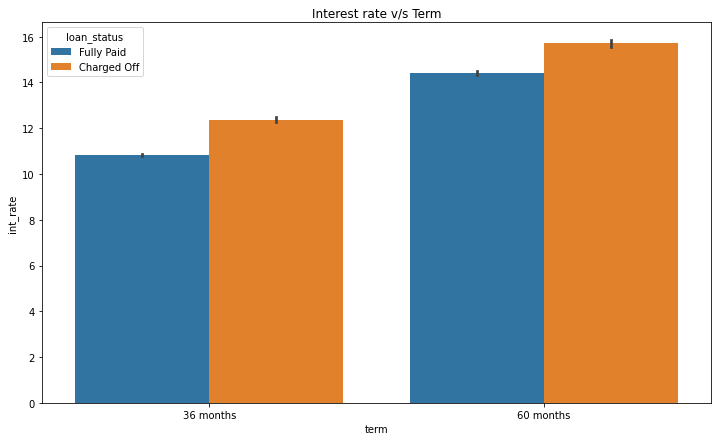

In [115]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,y='int_rate', x='term', hue ='loan_status')
plt.title("Interest rate v/s Term")
plt.show()

Interest rate is high for 60 month loan term.

**Grade v/s Funded Loan amount**

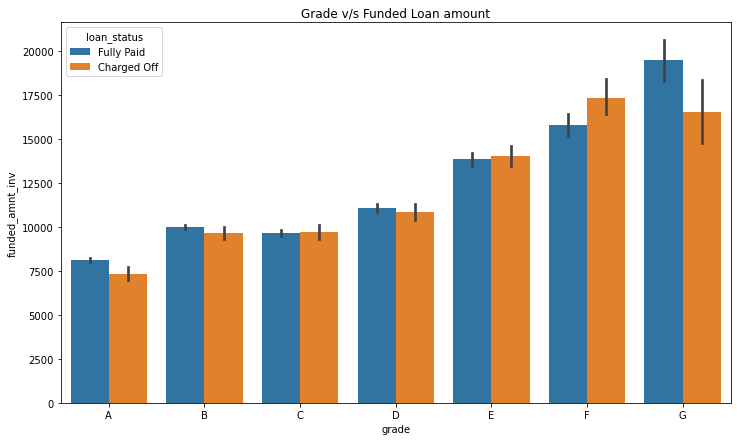

In [99]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,y='funded_amnt_inv', x='grade',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue ='loan_status')
plt.title("Grade v/s Funded Loan amount")
plt.show()

People having F grade and 17500 funded loan amount have defaulted loan more.

## Observations:
**The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :**
* revol_utl and int_rate has positive correlation
* approved_loan_amnt_ratio has positive correlation with issue_year
* People having income 60K to 70K with purpose "home improvement" have defaulted loan.
* People having income between 90K to 120K with loan received from investor between 20k to 25k have defaulted loan more.
* People having interest rate 20%-25% with annual income 70k to 80k have defaulted more
* The interest rate increases with Grade, and chances of defaulting increases with grade G. Also Loan taken for "House" purpose   has more chances of defaulting.
* People who have mortgaged home ownership and annual income 60k to 70k default more.
* People who have 10 years or more employement length and funded loan amount above 12k have more chances of defaulting.
* People with 14k-16k funded loan and verification status verified have defaulted loan.
* People having F grade and 17500 funded loan amount have defaulted loan more.
* Interest rate is high for 60 month loan term.